In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Year-to-Year Change in Internet Usage (%):
2014      NaN
2015     6.31
2016     7.32
2017     5.38
2018     7.94
2019     9.34
2020    10.83
2021     5.88
2022     0.00
Name: Internet Usage Change (%), dtype: float64

Year-to-Year Change in Social Media Users (%):
Year
2014    11.9
2015    11.0
2016    20.9
2017    14.6
2018     8.3
2019     7.2
2020    13.2
2021    10.1
2022     3.0
Name: Social Media Users Change (%), dtype: float64


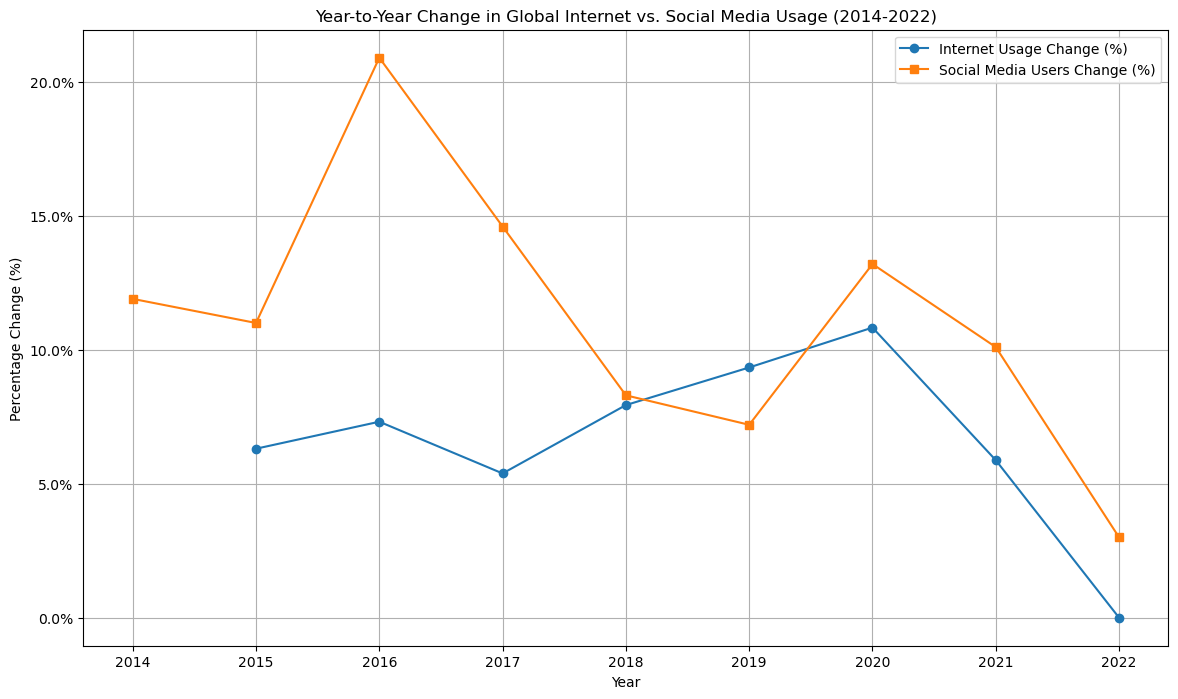

In [2]:
# Function to load and clean internet usage data
def load_internet_usage_data(filepath):
    internet_usage_df = pd.read_csv(filepath, skiprows=4)
    columns = ['Country Name'] + [str(year) for year in range(2014, 2023)]  # Focus on 2014 to 2022
    internet_usage_df = internet_usage_df[columns]
    internet_usage_world = internet_usage_df[internet_usage_df['Country Name'] == 'World']
    internet_usage_world = internet_usage_world.drop('Country Name', axis=1).transpose()
    internet_usage_world.columns = ['Internet Usage (%)']
    internet_usage_world['Internet Usage (%)'] = pd.to_numeric(internet_usage_world['Internet Usage (%)'], errors='coerce')
    internet_usage_world.index = internet_usage_world.index.map(int)
    internet_usage_world['Internet Usage Change (%)'] = internet_usage_world['Internet Usage (%)'].pct_change() * 100
    return internet_usage_world

# Function to prepare social media usage data
def prepare_social_media_usage_data():
    social_media_usage_data = {
        'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],  # Focus on 2014 to 2022
        'Social Media Users (Millions)': [1857, 2078, 2307, 2789, 3196, 3461, 3709, 4199, 4623],
        'Percentage Changes': [11.9, 11.0, 20.9, 14.6, 8.3, 7.2, 13.2, 10.1, 3.0]  # Matching the years
    }
    social_media_usage_df = pd.DataFrame(social_media_usage_data).set_index('Year')
    social_media_usage_df['Social Media Users Change (%)'] = social_media_usage_df['Percentage Changes']
    return social_media_usage_df

# Function to plot both datasets
def plot_data(internet_usage, social_media_usage):
    plt.figure(figsize=(14, 8))
    plt.plot(internet_usage.index, internet_usage['Internet Usage Change (%)'], label='Internet Usage Change (%)', marker='o')
    plt.plot(social_media_usage.index, social_media_usage['Social Media Users Change (%)'], label='Social Media Users Change (%)', marker='s')
    plt.title('Year-to-Year Change in Global Internet vs. Social Media Usage (2014-2022)')
    plt.xlabel('Year')
    plt.ylabel('Percentage Change (%)')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(2014, 2023))
    # Ensure y-axis labels are formatted as percentage
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
    plt.show()

# Function to display year-to-year change tables
def display_change_tables(internet_usage, social_media_usage):
    print("Year-to-Year Change in Internet Usage (%):")
    print(internet_usage['Internet Usage Change (%)'].round(2))
    print("\nYear-to-Year Change in Social Media Users (%):")
    print(social_media_usage['Social Media Users Change (%)'])

# Main execution flow
if __name__ == "__main__":
    internet_usage_world = load_internet_usage_data('platform_analysis/worldbank_data/API_IT.NET.USER.ZS_DS2_en_csv_v2_43762.csv')
    social_media_usage_df = prepare_social_media_usage_data()

    display_change_tables(internet_usage_world.loc[2014:2022], social_media_usage_df)
    plot_data(internet_usage_world.loc[2014:2022], social_media_usage_df)